In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
import requests as re
import tweepy


In [3]:
# Downloading The file programmatically using the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = re.get(url)
response
with open ('image predictions.tsv' , mode = 'wb') as file :
    file.write(response.content)



from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# The json text file was downloaded from the udacity website as I couldnt get twitter's api access key
# Read the json text file line by line
tweets_data = []
with open(r'C:\Users\HP\Downloads\tweet-json\tweet-json copy') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except :
            continue
            

In [5]:
# Load the dataframes required
df_archive2=pd.read_csv('twitter-archive-enhanced.csv')
df_image= pd.read_csv('image predictions.tsv',sep = '\t')
df_api=pd.DataFrame(tweets_data,columns=list(tweets_data[0].keys()))
# Reduce df api to 3 columns namely: id,retweet count ,favorite count
df_json=df_api[['id','retweet_count','favorite_count']]

In [6]:
# This is to ensure the dataframes were loaded correctly
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [7]:
df_image.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
df_archive2.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


# ASSESS

# DF_ARCHIVE2

In [9]:
# an overview of the columns available in this dataframe
df_archive2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [10]:
#checking the string values for the names whether there is an error
df_archive2.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [11]:
#checking for lower case names in the name column
df_archive2[df_archive2.name.str.islower()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [12]:
df_archive2.name.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: name, Length: 2356, dtype: bool

In [13]:
df_archive2[df_archive2.name=="None"]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [14]:
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_archive2.tweet_id.value_counts()

892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64

In [16]:
df_archive2.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df_archive2.retweeted_status_user_id.unique()

array([           nan, 4.19698384e+09, 1.96074000e+07, 5.12804507e+08,
       1.54767397e+08, 7.87461778e+17, 3.63890752e+08, 5.87097230e+07,
       6.66990130e+07, 7.47554344e+17, 3.41021133e+08, 5.97064155e+08,
       4.11984180e+07, 8.11740824e+08, 7.26634734e+08, 7.12457247e+17,
       4.46675020e+07, 4.87197737e+08, 2.48855660e+07, 7.99237010e+07,
       1.22832566e+09, 1.73272909e+09, 1.95036846e+08, 2.80479778e+08,
       7.83214000e+05, 4.29683174e+09])

In [18]:
df_archive2[df_archive2.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [19]:
df_archive2.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
df_archive2['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [21]:
df_archive2.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [22]:
df_archive2.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

# DF_IMAGE


In [23]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [24]:
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
df_image.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1044,712717840512598017,https://pbs.twimg.com/media/CeQVF1eVIAAJaTv.jpg,1,Great_Pyrenees,0.732043,True,kuvasz,0.121375,True,Irish_wolfhound,0.049524,True
880,698635131305795584,https://pbs.twimg.com/ext_tw_video_thumb/69863...,1,Samoyed,0.158464,True,kuvasz,0.089402,True,West_Highland_white_terrier,0.025037,True
173,669006782128353280,https://pbs.twimg.com/media/CUjKHs0WIAECWP3.jpg,1,Chihuahua,0.127178,True,Italian_greyhound,0.054215,True,pillow,0.048592,False
692,684222868335505415,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False
1972,869596645499047938,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,1,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False
1797,831552930092285952,https://pbs.twimg.com/media/C4pE-I0WQAABveu.jpg,1,Chihuahua,0.257415,True,Pembroke,0.161442,True,French_bulldog,0.092143,True
1507,785639753186217984,https://pbs.twimg.com/media/CucnLmeWAAALOSC.jpg,1,porcupine,0.978042,False,sea_urchin,0.006106,False,echidna,0.005442,False
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False


In [26]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
df_image.isna()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df_image.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [30]:
df_image[df_image.duplicated()== True]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
sum(df_image.duplicated())

0

# DF_JSON

In [32]:
df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [33]:
df_json.sample(15)

,id,retweet_count,favorite_count
1082,738402415918125056,955,3599
1104,734787690684657664,7102,13745
2025,671874878652489728,601,1330
742,780459368902959104,1224,5892
799,772615324260794368,3914,0
1481,693262851218264065,568,2459
118,869772420881756160,10663,43710
663,790723298204217344,2704,0
53,881666595344535552,11099,51522
615,796484825502875648,2042,8472


In [34]:
df_json.duplicated().sum()


0

In [35]:
df_json.isna()

,id,retweet_count,favorite_count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2349,False,False,False
2350,False,False,False
2351,False,False,False
2352,False,False,False


In [36]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [37]:
df_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [38]:
df_json.id.value_counts().sum()

2354

In [39]:
#checking for duplicates
df_json.id.duplicated().sum()

0

In [40]:
#Trying to see whether there are any duplicates in the other dataframe for comparison purposes
df_archive2.tweet_id.duplicated().sum()

0

In [41]:
#Finding how many ids are missing
len(df_archive2.tweet_id)-len(df_json.id)

2

In [42]:
#Checking for null values
df_json.isnull().sum()

id                0
retweet_count     0
favorite_count    0
dtype: int64

# OBSERVATIONS
# Quality
 

                Df_Archive2
 - Source values are in a '<a href=url <a/>'
 - Timestamp is in a wrong datatype
 - There is an issue with the dog names, the incorrect names are in lower case
 - The rating_denominator column should have only a value of 10
 - tweets without expanded urls should be dropped
 - Change the tweet_id datatype
               Df_Image
 - Multi-word names use underscores instead of spaces in the p1,p2 and p3 columns 
 - In the 'p'columns names start with an uppercase while some start with a lower case

               Df_Json
 - There are missing ids in the file
 - Change the id datattype
                                

# Tidiness

 - The puppo,floofer,doggo and pupper should be in a single column
 - Drop the retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,in_reply_to_status_id ,  in_reply_to_user_id columns
 - The 3 dataframes should be merged into one

# CLEAN

In [43]:
# Create a copy of all the dataframes
df_archive1 = df_archive2.copy()
df_json1 = df_json.copy()
df_image1 = df_image.copy()

# Define

THE SOURCE COLUMN IS IN '<a href=url /a>' FORMAT 
ITS GOING TO BE CHANGED TO THE SOURCE ONLY   

# Code

In [44]:
# Using str.replace to get the actual source from the '<a href=url /a>' format
df_archive1['source']=df_archive1['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone',regex=False)
df_archive1['source']=df_archive1['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client',regex=False)
df_archive1['source']=df_archive1['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine - Make a Scene',regex=False)
df_archive1['source']=df_archive1['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck',regex=False)    

# Test

In [45]:
# Comparing our old dataframe to the new one
df_archive2.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [46]:
df_archive1.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [47]:
df_archive1['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

# Define

CONVERT TIMESTAMP TO THE DATETIME FORMAT

# Code

In [48]:
df_archive1['timestamp'] = pd.to_datetime(df_archive1['timestamp'])

# Test

In [49]:
# Comparing our old dataframe to the new one
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [50]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

# Define

CHANGED THE FAULTY(LOWER CASE) NAMES TO NONE

# Code

In [51]:
faulty_names = ['such','a','quite','not','one','an','very','my','his','getting',
                    'this', 'actually','unacceptable','all', 'old','infuriating',
                    'the','by','officially','life','light','space','incredibly','mad',
                    'just']


In [52]:
 for name in faulty_names:
        df_archive1.name.replace(name,'None',inplace=True)


# Test

In [53]:
# Comparing our old dataframe to the new one
df_archive2.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [54]:
df_archive1.name.value_counts()

None          854
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

In [55]:
df_archive1[df_archive1.name.str.islower()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# Define

The rating denominator is to be given a constant value of 10

# Code

In [56]:
df_archive1['rating_denominator']=10

# Test

In [57]:
# Comparing our old dataframe to the new one
df_archive2['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [58]:
df_archive1['rating_denominator'].unique()

array([10], dtype=int64)

# Define

all columns without expanded urls i.e no images should be dropped 

# Code

In [59]:
len(df_archive1[df_archive1.expanded_urls.isnull()])

59

In [60]:
df_archive1=df_archive1[~df_archive1['expanded_urls'].isnull()]

# Test

In [61]:
# Comparing our old dataframe to the new one
len(df_archive2[df_archive2.expanded_urls.isnull()])

59

In [62]:
len(df_archive1[df_archive1.expanded_urls.isnull()])

0

# Define

The datatype of the tweet id column is to be changed using astype

# Code

In [63]:
df_archive1.tweet_id.astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2297, dtype: object

# Test

In [64]:
# Comparing our old dataframe to the new one
type(df_archive2.tweet_id)

pandas.core.series.Series

In [65]:
type(df_archive1.tweet_id)

pandas.core.series.Series

# Define

drop all rows where there are retweets 

# Code

In [66]:
df_archive1 = df_archive1[df_archive1['retweeted_status_id'].isna()]
df_archive1 = df_archive1[df_archive1['in_reply_to_status_id'].isna()]
df_archive1 = df_archive1[df_archive1['in_reply_to_user_id'].isna()]

# Test

In [67]:
# Comparing our old dataframe to the new one
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [68]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

In [69]:
df_archive1.in_reply_to_status_id.unique()

array([nan])

# Define

 using the drop function in pandas to remove all unwanted columns

# Code

In [70]:
columns=['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id']
df_archive1 = df_archive1.drop(columns,axis=1)

# Test

In [71]:
# Comparing our old dataframe to the new one
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [72]:
df_archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   doggo               2094 non-null   object             
 9   floofer             2094 non-null   object             
 10  pupper              2094 non-null   object             
 11  puppo               2094 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

# Define

Merge the puppo,pupper,floofer,doggo columns into 1 column called dog_stage

# Code

In [73]:
df_archive1['dog_stage'] = df_archive1['text'].str.extract('(doggo|floofer|pupper|puppo)')
df_archive1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,NaN


In [74]:
columns=['doggo','puppo','pupper','floofer']
df_archive1=df_archive1.drop(columns,axis=1)

In [75]:
# Filling all null values in the new column with None
df_archive1.dog_stage=df_archive1.dog_stage.fillna('None')

# Test

In [76]:
# Comparing our old dataframe to the new one
df_archive2.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [77]:
df_archive1.dog_stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

# Define

The '_' used in the p1,p2,p3 columns are replaced with spaces using the .str.replace()

# Code

In [78]:
df_image1.p1 = df_image1['p1'].str.replace('_',' ')
df_image1.p2 = df_image1['p2'].str.replace('_',' ')
df_image1.p3 = df_image1['p3'].str.replace('_',' ')


# Test

In [79]:
# Comparing our old dataframe to the new one
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [80]:
df_image1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


# Define

A FUCTION IS CREATED TO ENSURE THE APPROPRIATE CAPITALISATION OF THE VALUES IN THE P1,P2,P3 COLUMNS

# Code

In [81]:
def x(value):
    z=value.lower()
    y=z.capitalize()
    return y
df_image1.p1=df_image1.p1.apply(x)
df_image1.p2=df_image1.p2.apply(x)
df_image1.p3=df_image1.p3.apply(x)

# Test

In [82]:
# Comparing our old dataframe to the new one
df_image.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
814,692568918515392513,https://pbs.twimg.com/media/CZx_wV2UMAArgsJ.jpg,2,golden_retriever,0.636845,True,Labrador_retriever,0.163362,True,Pekinese,0.045554,True
752,688116655151435777,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,1,pug,0.973819,True,Chihuahua,0.010891,True,Staffordshire_bullterrier,0.006864,True
1542,791312159183634433,https://pbs.twimg.com/media/CvtONV4WAAAQ3Rn.jpg,4,miniature_pinscher,0.892925,True,toy_terrier,0.095524,True,Doberman,0.003544,True
967,706310011488698368,https://pbs.twimg.com/media/Cc1RNHLW4AACG6H.jpg,1,Pembroke,0.698165,True,Chihuahua,0.105834,True,bloodhound,0.062030,True
1127,727644517743104000,https://pbs.twimg.com/media/Chkc1BQUoAAa96R.jpg,2,Great_Pyrenees,0.457164,True,kuvasz,0.391710,True,Labrador_retriever,0.094523,True
81,667470559035432960,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,1,toy_poodle,0.304175,True,pug,0.223427,True,Lakeland_terrier,0.073316,True
1124,727286334147182592,https://pbs.twimg.com/media/ChfXDrGUkAEAtF-.jpg,1,bonnet,0.146440,False,sock,0.083091,False,Chihuahua,0.070554,True
797,691090071332753408,https://pbs.twimg.com/media/CZc-u7IXEAQHV1N.jpg,1,barrow,0.241637,False,tub,0.238450,False,bathtub,0.167285,False


In [83]:
df_image1.sample(8)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English springer,0.990300,True,Welsh springer spaniel,0.002080,True,Cocker spaniel,0.002014,True
786,690360449368465409,https://pbs.twimg.com/media/CZSnKw8WwAAAN7q.jpg,1,Pug,0.686933,True,French bulldog,0.076359,True,Brabancon griffon,0.035007,True
949,704847917308362754,https://pbs.twimg.com/media/CcgfcANW4AA9hzr.jpg,1,Golden retriever,0.857240,True,Labrador retriever,0.135460,True,Tibetan mastiff,0.001903,True
1405,769940425801170949,https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg,1,Miniature pinscher,0.796313,True,Chihuahua,0.155413,True,Staffordshire bullterrier,0.030943,True
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire terrier,0.907990,True,Silky terrier,0.076883,True,Australian terrier,0.008473,True
1874,845397057150107648,https://pbs.twimg.com/media/C7t0IzLWkAINoft.jpg,1,Dandie dinmont,0.394404,True,Maltese dog,0.186537,True,West highland white terrier,0.181985,True
660,682406705142087680,https://pbs.twimg.com/media/CXhlRmRUMAIYoFO.jpg,1,Wombat,0.709344,False,Koala,0.169758,False,Beaver,0.079433,False


# Define

Merging the 3 dataframes into 1 dataframe

# Code

In [84]:
# changing the datatype of the tweet_id column to string
df_image1.tweet_id.astype(str)

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: object

In [85]:
# changing the datatype of the id column to string
df_json1.id.astype(str)

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: id, Length: 2354, dtype: object

In [86]:
# changing the name of the tweet_id column from id to tweet_id for easy merging
df_json1['tweet_id']=df_json1.id
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [87]:
# The actual merging of the dataframes
clean_archive=pd.merge(df_archive1,df_json1,on='tweet_id',how='left')
clean_archive=pd.merge(clean_archive,df_image1,on='tweet_id',how='left')

# Test

In [88]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2093
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   dog_stage           2094 non-null   object             
 9   id                  2094 non-null   int64              
 10  retweet_count       2094 non-null   int64              
 11  favorite_count      2094 non-null   int64              
 12  jpg_url             1971 non-null 

# Storing the dataframe

In [89]:
clean_archive.to_csv('twitter_archive_master.csv')

# Visualisation

(-1.3326100868400776,
 1.5300672255673966,
 -1.0675238513996852,
 1.1472824887450266)

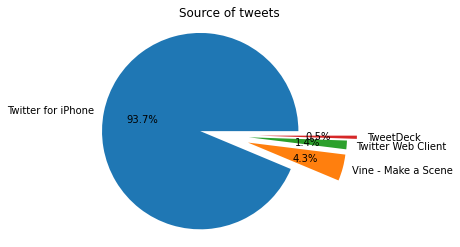

In [90]:
source_df=clean_archive.source.value_counts()
source_df
plt.pie(source_df,
       labels=['Twitter for iPhone','Vine - Make a Scene','Twitter Web Client','TweetDeck'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0.2,0.3,0.3,0.4)
       )
plt.title('Source of tweets')
plt.axis('equal')

Twitter for iphone was the most common source of tweets in the WeRateDogs
TweetDeck was the least used source of tweets

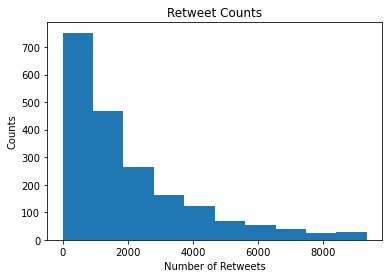

In [91]:
limit = np.nanpercentile(clean_archive['retweet_count'], 95)
parameter = clean_archive['retweet_count'] < limit
data = clean_archive['retweet_count'][parameter]
plt.hist(data, bins = 10, range = [0, limit])
plt.title("Retweet Counts")
plt.xlabel("Number of Retweets")
plt.ylabel("Counts")
plt.show()

Text(0.5, 1.0, 'Retweets and Favorties Scatter plt ')

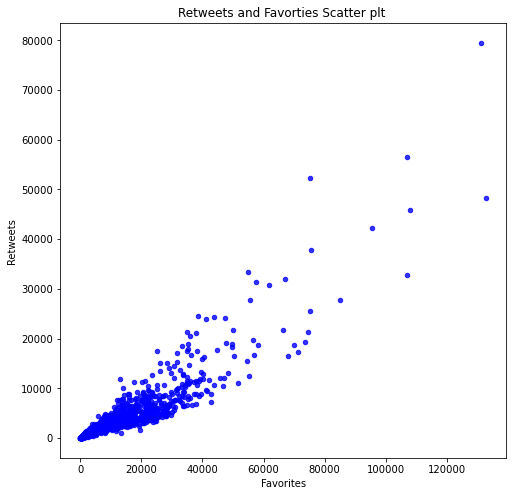

In [92]:
clean_archive.plot(kind='scatter',x='favorite_count',y='retweet_count',alpha = 0.8, figsize = (8,8),color = 'blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and Favorties Scatter plt ')

As the favorites(likes)increase the retweets increase hence deducing that there is a linear relationship between retweet count and favorite count 

In [93]:
piv=clean_archive.pivot_table(values='favorite_count',index='source')
piv

,favorite_count
source,
TweetDeck,5793.545455
Twitter Web Client,5869.566667
Twitter for iPhone,9100.115698
Vine - Make a Scene,7969.527473


The 'Twitter for iPhone' is the source with the most likes

In [94]:
c=clean_archive.pivot_table(values='retweet_count',index='source')
c

,retweet_count
source,
TweetDeck,2599.090909
Twitter Web Client,2473.833333
Twitter for iPhone,2804.210499
Vine - Make a Scene,3854.417582


The 'Vine-Make a Scene' is the source with the most retweets

(-1.30748031329023,
 1.5289200880606613,
 -1.1716555704337481,
 1.2140921235322504)

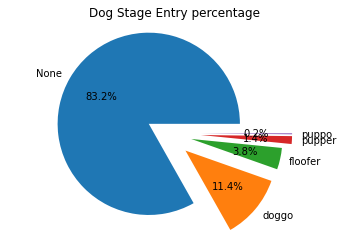

In [95]:
dog_df=clean_archive.dog_stage.value_counts()
dog_df
plt.pie(dog_df,
       labels=['None','doggo','floofer','pupper','puppo'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0.2,0.3,0.3,0.4,0.4)
       )
plt.title('Dog Stage Entry percentage')
plt.axis('equal')

This pie chart shows that 83% percentage of the records did not specify a dog stage

(-1.2410594929402183,
 1.525497730301519,
 -1.441869723252281,
 1.2985380125779271)

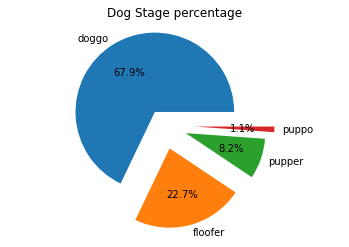

In [96]:
dog_stage=clean_archive['dog_stage'].replace('None',np.NaN)
dog_stage=dog_stage.value_counts()
dog_stage
plt.pie(dog_stage,
       labels=['doggo','floofer','pupper','puppo'],
       autopct='%1.1f%%',
       shadow=False,
       explode=(0.2,0.3,0.3,0.4)
       )
plt.title('Dog Stage percentage')
plt.axis('equal')


I deduced from this pie chart that doggo was the most common type of dog among the dogs rated in the weratedogs archive with a percentage of 67.3% followed by floofer(23%) then pupper(8.7%) puppo(1%)

In [97]:
ratings=clean_archive.pivot_table(values='rating_numerator',index='dog_stage')
ratings

,rating_numerator
dog_stage,
None,12.083812
doggo,14.037500
floofer,12.250000
pupper,12.364017
puppo,12.137931


doggo had the highest ratings on average while puppo had the least average ratings among the non null entries

In [98]:
likes=clean_archive.pivot_table(values='favorite_count',index='dog_stage')
likes

,favorite_count
dog_stage,
None,8664.672216
doggo,16088.912500
floofer,18576.750000
pupper,7131.497908
puppo,22750.448276


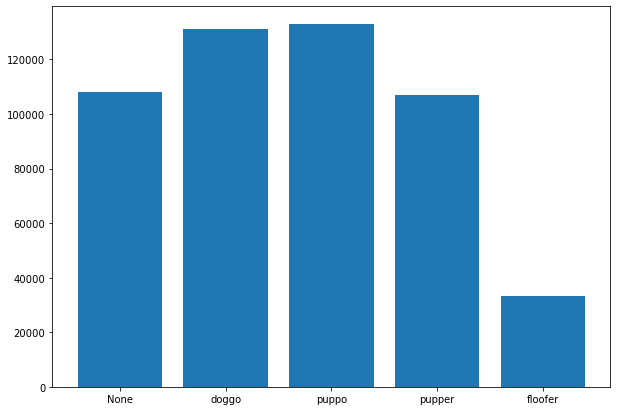

In [100]:
name = clean_archive['dog_stage']
price = clean_archive['favorite_count']

# Figure Size
fig = plt.figure(figsize =(10, 7))

# Horizontal Bar Plot
plt.bar(name, price)

# Show Plot
plt.show()
